In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SkinDisease",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1495 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names
class_names

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-measles',
 'VI-monkeypox',
 'VI-shingles']

In [6]:
len(dataset)

47

In [7]:
47*32

1504

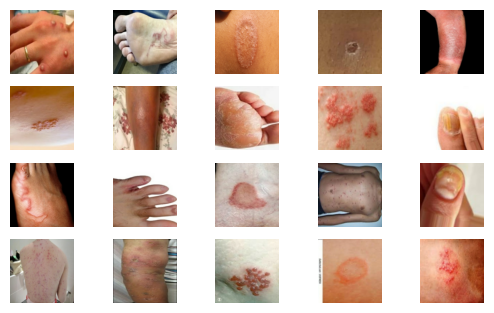

In [8]:


for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        # plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
train_size = 0.8
len(dataset)*train_size

37.6

In [10]:
train_ds = dataset.take(37)
len(train_ds)

37

In [11]:
test_ds = dataset.skip(37)
len(test_ds)

10

In [12]:
val_size = 0.1
len(dataset)*val_size

4.7

In [13]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [14]:
test_ds = test_ds.skip(4)
len(test_ds)

6

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

37

In [18]:
len(val_ds)

4

In [19]:
len(test_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:

try:
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds
    )
except tf.errors.InvalidArgumentError as e:
    print("InvalidArgumentError occurred during training:", e)


Epoch 1/50
37/37 [==============================] - 55s 1s/step - loss: 2.2778 - accuracy: 0.1770 - val_loss: 2.2115 - val_accuracy: 0.2344
Epoch 2/50
37/37 [==============================] - 44s 1s/step - loss: 2.2444 - accuracy: 0.1864 - val_loss: 2.2186 - val_accuracy: 0.2344
Epoch 3/50
37/37 [==============================] - 43s 1s/step - loss: 2.1803 - accuracy: 0.2434 - val_loss: 2.0548 - val_accuracy: 0.3203
Epoch 4/50
37/37 [==============================] - 46s 1s/step - loss: 2.0116 - accuracy: 0.2834 - val_loss: 1.8572 - val_accuracy: 0.3203
Epoch 5/50
37/37 [==============================] - 47s 1s/step - loss: 1.8463 - accuracy: 0.3430 - val_loss: 1.6424 - val_accuracy: 0.4453
Epoch 6/50
37/37 [==============================] - 44s 1s/step - loss: 1.6899 - accuracy: 0.4111 - val_loss: 1.5177 - val_accuracy: 0.4844
Epoch 7/50
37/37 [==============================] - 47s 1s/step - loss: 1.5609 - accuracy: 0.4587 - val_loss: 1.2999 - val_accuracy: 0.5547
Epoch 8/50
37/37 [==

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params


In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
import numpy as np
np.argmax([4.0255643e-13, 1.5018880e-08, 9.9027467e-08, 9.9999630e-01, 2.9897484e-28,
 2.8818323e-22, 2.6648679e-33, 1.2790141e-16, 3.5370842e-06, 2.4498503e-22,
 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.4045852e-36,
 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
 0.0000000e+00, 0.0000000e+00, 1.3216994e-32])

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print(image_batch)
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [60]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.argmax(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 34ms/step


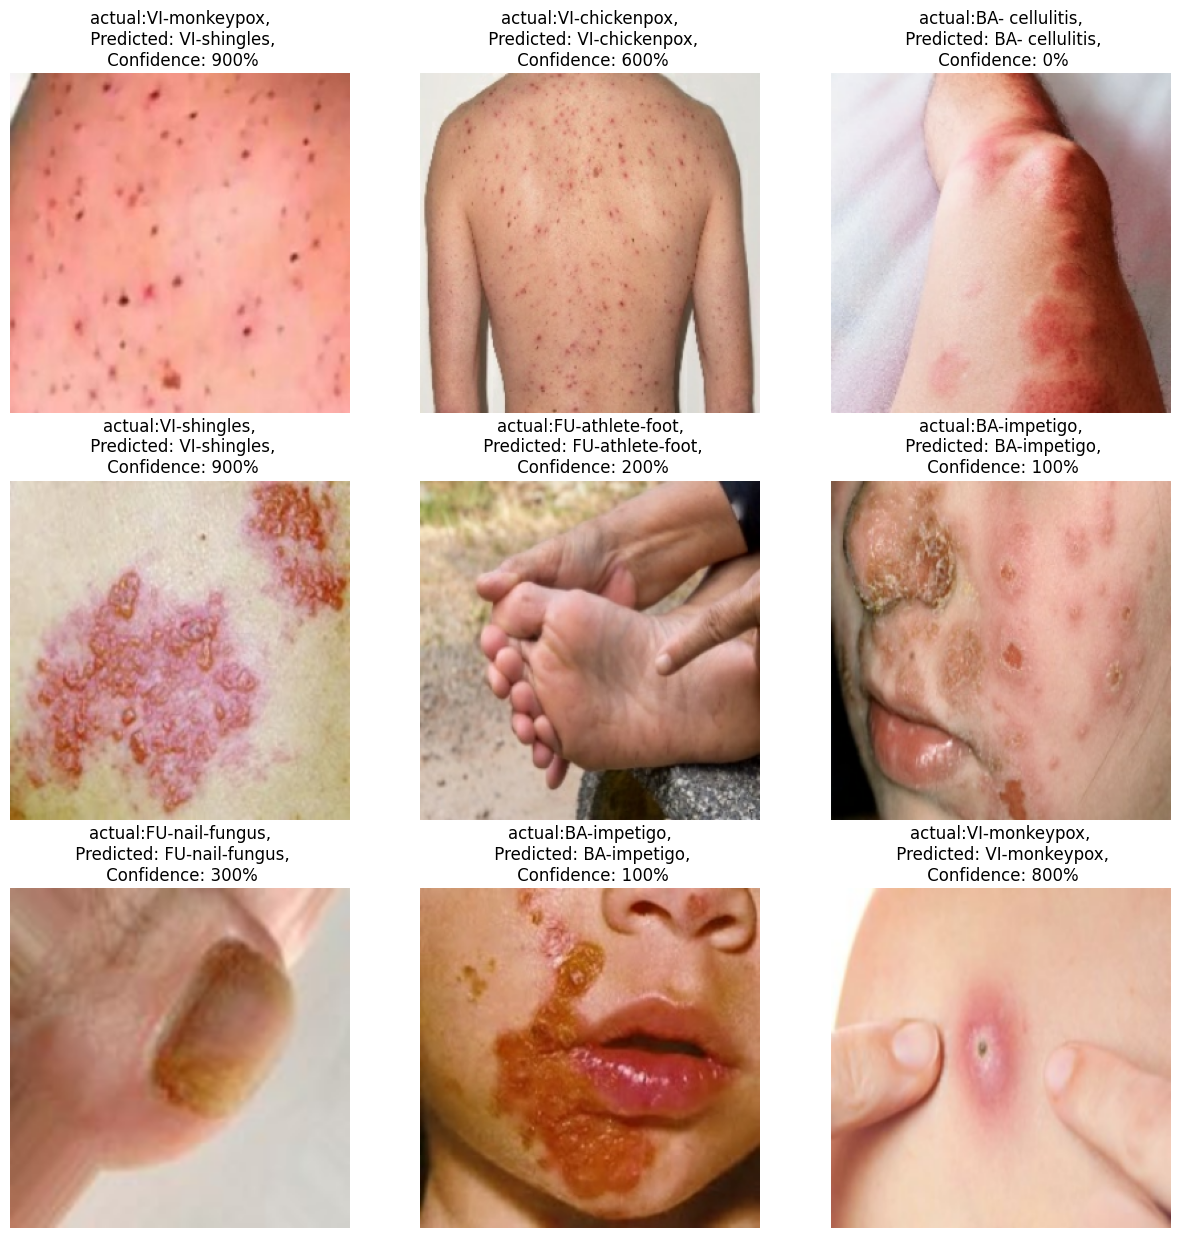

In [61]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class ,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"actual:{actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis('off')

In [62]:
model_version=1
model.save(f"../models/")

INFO:tensorflow:Assets written to: ../models/assets


INFO:tensorflow:Assets written to: ../models/assets


In [63]:
model.save('model2.h5')